# About Project- Used Car PRice Predication

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase

1. Data Collection Phase- 

You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.) We need web scraping for this. We fetched data for different locations.Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. We made changes in scrapped daaset as per our requirement. it completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback.

2. Model Building Phase - 

After collecting the data, We need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import joblib
import pickle
import warnings
warnings.filterwarnings("ignore")

# EDA

Loading Dataset

In [2]:
#uploading dataset
df=pd.read_csv("Used_Cars_Data.csv")
df.head()

,Unnamed: 0,Car Name,Making Year,Registration year,Fule,km_driven,Engine_Displacement,No_Of_Owner,RTO,Transmission,Insurance_Type,Current_Price,Avg_market_price,New_Car_Road_Price,Mileage,Seats,Color,Engine,Max_Power,Torque
0,0,2019 Mahindra XUV500,2019,Mar-19,Diesel,59803,2179 cc,1st Owner,DL12,Manual,Third Party insurance,1186000,1245300,1699700,15.1 kmpl,12345671,Other,2179 CC,152.87bhp,360Nm
1,1,2016 Maruti Alto K10,2016,Mar-16,CNG,59902,998 cc,1st Owner,UP16,Manual,Third Party insurance,280000,294000,497476,32.26 kmpl,4,Grey,998 CC,58.3bhp,78Nm
2,2,2017 Maruti Eeco,2017,Feb-17,CNG,47479,1196 cc,1st Owner,DL4C,Manual,Third Party insurance,338500,355425,544727,21.94 km/kg,5,Other,1196 CC,61.7bhp,85Nm
3,3,2018 Maruti Baleno,2018,Nov-18,Petrol,43228,1197 cc,1st Owner,UP16,Manual,Third Party insurance,600500,630525,840597,21.01 kmpl,R16,5,1197 CC,81.80bhp,113Nm
4,4,2015 Maruti Swift,2015,Feb-15,Diesel,43951,1248 cc,1st Owner,DL5C,Manual,Third Party insurance,430500,452025,798110,28.4 kmpl,5,Other,1248 CC,74bhp,190Nm


In [3]:
df.shape

(935, 20)

In this dataset 935 columns and 20 rows

In [4]:
##check missing values
df.isnull().sum()

Unnamed: 0             0
Car Name               0
Making Year            0
Registration year      0
Fule                   0
km_driven              0
Engine_Displacement    0
No_Of_Owner            0
RTO                    0
Transmission           0
Insurance_Type         0
Current_Price          0
Avg_market_price       0
New_Car_Road_Price     0
Mileage                0
Seats                  0
Color                  5
Engine                 0
Max_Power              0
Torque                 0
dtype: int64

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           935 non-null    int64 
 1   Car Name             935 non-null    object
 2   Making Year          935 non-null    int64 
 3   Registration year    935 non-null    object
 4   Fule                 935 non-null    object
 5   km_driven            935 non-null    object
 6   Engine_Displacement  935 non-null    object
 7   No_Of_Owner          935 non-null    object
 8   RTO                  935 non-null    object
 9   Transmission         935 non-null    object
 10  Insurance_Type       935 non-null    object
 11  Current_Price        935 non-null    int64 
 12  Avg_market_price     935 non-null    int64 
 13  New_Car_Road_Price   935 non-null    int64 
 14  Mileage              935 non-null    object
 15  Seats                935 non-null    object
 16  Color   

# Data Cleanining

We will drop some columns which are not going to useto predict the used car price.

In [6]:
#We can drop Umnamed Column because there is no use of it.
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
# year and registration year bothare same, So we can drop redistration year column.
df.drop(['Registration year'],axis=1,inplace=True)

In [8]:
#Engine Displacement and Engine, both are showing same result so we can drop one of them.
df.drop(['Engine_Displacement'],axis=1,inplace=True)

In [9]:
#We can dropRTO column, as there isno use of this column to predict the price.
df.drop(['RTO'],axis=1,inplace=True)

Mileage and Engine columns have string values so we will remove it.

In [10]:
Mil=df["Mileage"].str.split(" ", expand = True)
df["Mileage"] = pd.to_numeric(Mil[0], errors = 'coerce')
df["Mileage"].fillna(df["Mileage"].astype("float64").mean(), inplace = True)

Eng=df["Engine"].str.split(" ", expand = True)
df["Engine"] = pd.to_numeric(Eng[0], errors = 'coerce')
df["Engine"].fillna(df["Engine"].astype("float64").mean(), inplace = True)

In [11]:
df.head()

,Car Name,Making Year,Fule,km_driven,No_Of_Owner,Transmission,Insurance_Type,Current_Price,Avg_market_price,New_Car_Road_Price,Mileage,Seats,Color,Engine,Max_Power,Torque
0,2019 Mahindra XUV500,2019,Diesel,59803,1st Owner,Manual,Third Party insurance,1186000,1245300,1699700,15.10,12345671,Other,2179,152.87bhp,360Nm
1,2016 Maruti Alto K10,2016,CNG,59902,1st Owner,Manual,Third Party insurance,280000,294000,497476,32.26,4,Grey,998,58.3bhp,78Nm
2,2017 Maruti Eeco,2017,CNG,47479,1st Owner,Manual,Third Party insurance,338500,355425,544727,21.94,5,Other,1196,61.7bhp,85Nm
3,2018 Maruti Baleno,2018,Petrol,43228,1st Owner,Manual,Third Party insurance,600500,630525,840597,21.01,R16,5,1197,81.80bhp,113Nm
4,2015 Maruti Swift,2015,Diesel,43951,1st Owner,Manual,Third Party insurance,430500,452025,798110,28.40,5,Other,1248,74bhp,190Nm


lets make a final dataset with the required columns which are usefull for the price prediction.

In [12]:
final_dataset=df[['Making Year','Current_Price','Avg_market_price',"New_Car_Road_Price",'Fule','Transmission','No_Of_Owner']]

In [13]:
final_dataset.head()

,Making Year,Current_Price,Avg_market_price,New_Car_Road_Price,Fule,Transmission,No_Of_Owner
0,2019,1186000,1245300,1699700,Diesel,Manual,1st Owner
1,2016,280000,294000,497476,CNG,Manual,1st Owner
2,2017,338500,355425,544727,CNG,Manual,1st Owner
3,2018,600500,630525,840597,Petrol,Manual,1st Owner
4,2015,430500,452025,798110,Diesel,Manual,1st Owner


final Dataset has some string values,lets check it and convert into numbericals values with help of LabelEncolder.



# Pre-Processing

In [14]:
print(df['No_Of_Owner'].unique())
print(df['Fule'].unique())
print(df['Transmission'].unique())

['1st Owner' '2nd Owner' '3rd Owner']
['Diesel' 'CNG' 'Petrol' 'LPG']
['Manual' 'Automatic']


In [15]:
print(df['No_Of_Owner'].value_counts())
print(df['Fule'].value_counts())
print(df['Transmission'].value_counts())

1st Owner    794
2nd Owner    140
3rd Owner      1
Name: No_Of_Owner, dtype: int64
Petrol    572
Diesel    345
CNG        17
LPG         1
Name: Fule, dtype: int64
Manual       794
Automatic    141
Name: Transmission, dtype: int64


In [16]:
#Encoding "No of Owner"column values into Numerical numbers

import sklearn
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
final_dataset.replace({'1st Owner':1,'2nd Owner':2,'3rd Owner':3},inplace=True)
final_dataset.replace({'Petrol':1,'Diesel':2,'CNG':3,'LPG':4},inplace=True)
final_dataset.replace({'Manual':1,'Automatic':2},inplace=True)

In [17]:
print(df['No_Of_Owner'].value_counts())
print(df['Fule'].value_counts())
print(df['Transmission'].value_counts())

1st Owner    794
2nd Owner    140
3rd Owner      1
Name: No_Of_Owner, dtype: int64
Petrol    572
Diesel    345
CNG        17
LPG         1
Name: Fule, dtype: int64
Manual       794
Automatic    141
Name: Transmission, dtype: int64


# Statistical Apporch

In [18]:
final_dataset.head()

,Making Year,Current_Price,Avg_market_price,New_Car_Road_Price,Fule,Transmission,No_Of_Owner
0,2019,1186000,1245300,1699700,2,1,1
1,2016,280000,294000,497476,3,1,1
2,2017,338500,355425,544727,3,1,1
3,2018,600500,630525,840597,1,1,1
4,2015,430500,452025,798110,2,1,1


In [19]:
final_dataset.describe()

,Making Year,Current_Price,Avg_market_price,New_Car_Road_Price,Fule,Transmission,No_Of_Owner
count,935.000000,9.350000e+02,9.350000e+02,9.350000e+02,935.000000,935.000000,935.000000
mean,2015.834225,4.763454e+05,5.001627e+05,7.985405e+05,1.408556,1.150802,1.151872
std,2.367089,1.843924e+05,1.936120e+05,3.348315e+05,0.533595,0.358047,0.362058
min,2008.000000,1.060000e+05,1.113000e+05,3.209150e+05,1.000000,1.000000,1.000000
25%,2014.000000,3.367500e+05,3.535875e+05,5.671135e+05,1.000000,1.000000,1.000000
50%,2016.000000,4.620000e+05,4.851000e+05,7.479350e+05,1.000000,1.000000,1.000000
75%,2018.000000,5.750000e+05,6.037500e+05,9.424970e+05,2.000000,1.000000,1.000000
max,2021.000000,1.474500e+06,1.548225e+06,3.768743e+06,4.000000,2.000000,3.000000


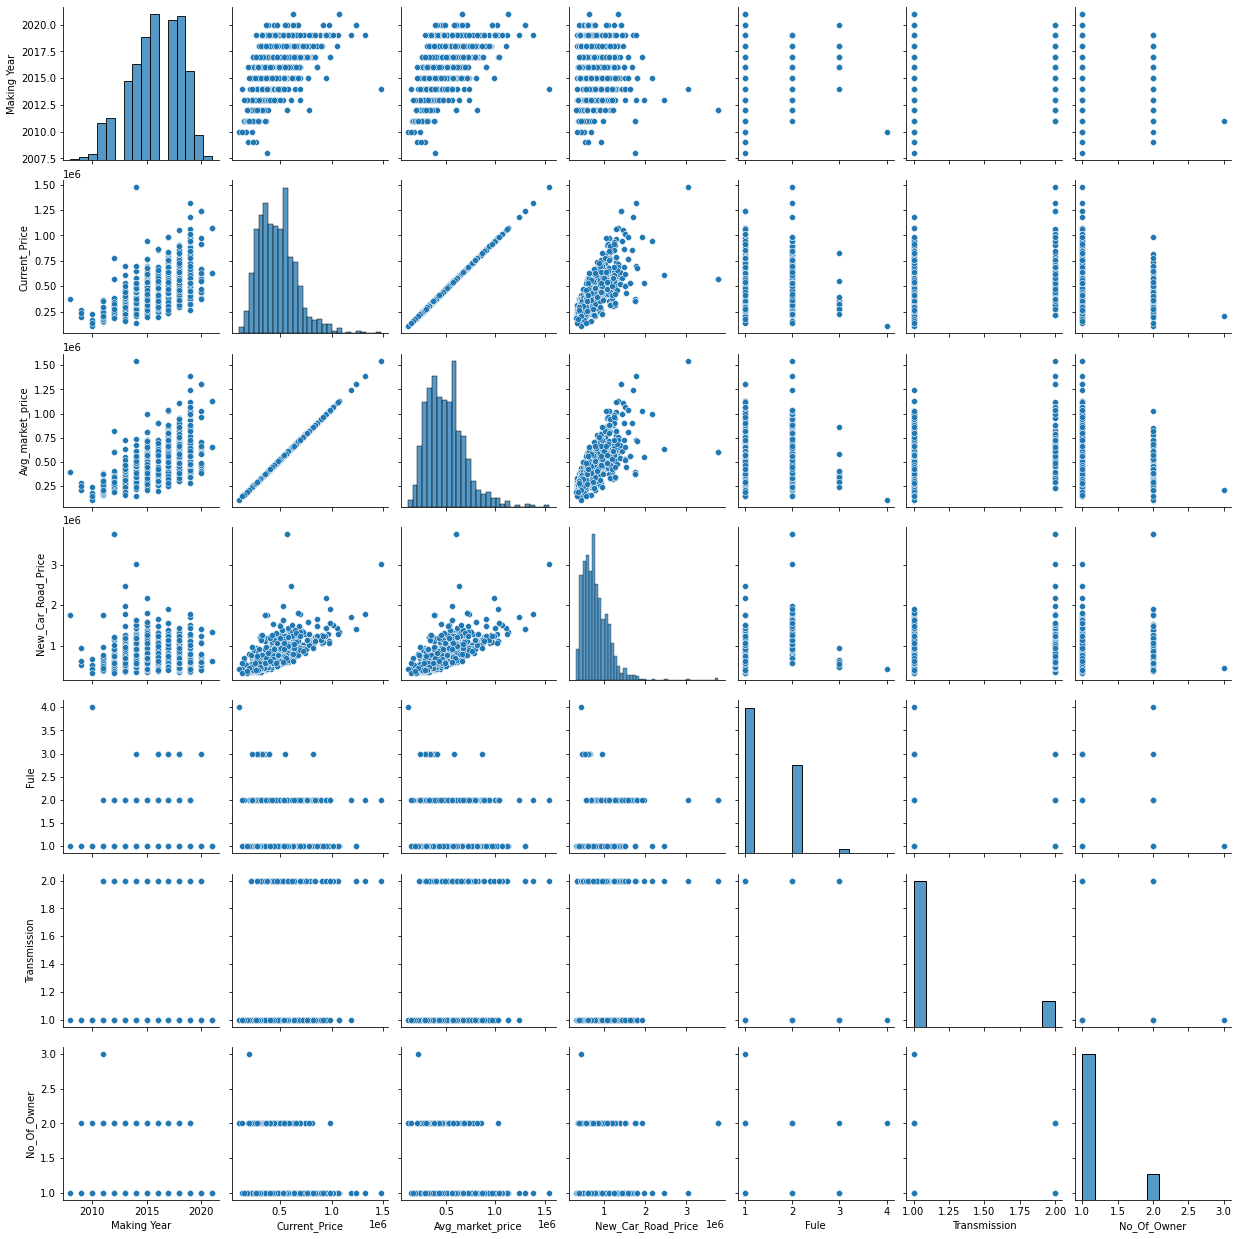

In [20]:
sns.pairplot(final_dataset)

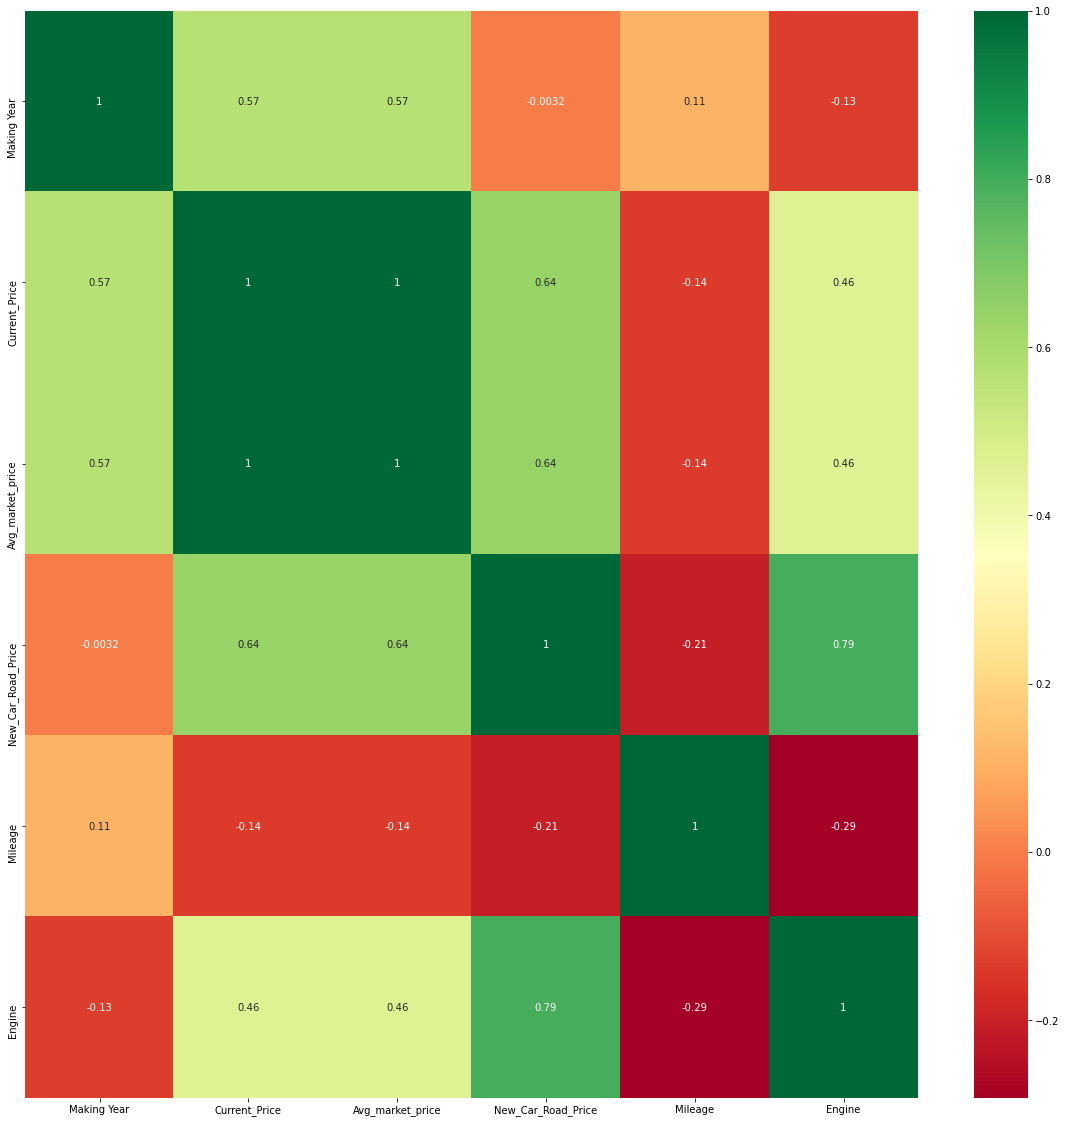

In [21]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
final_dataset_corr=final_dataset.corr()
final_dataset_corr

,Making Year,Current_Price,Avg_market_price,New_Car_Road_Price,Fule,Transmission,No_Of_Owner
Making Year,1.000000,0.566239,0.566239,-0.003198,-0.108225,0.086376,-0.226695
Current_Price,0.566239,1.000000,1.000000,0.637495,0.118840,0.204110,-0.154903
Avg_market_price,0.566239,1.000000,1.000000,0.637495,0.118840,0.204110,-0.154903
New_Car_Road_Price,-0.003198,0.637495,0.637495,1.000000,0.355286,0.195108,0.047115
Fule,-0.108225,0.118840,0.118840,0.355286,1.000000,-0.109875,-0.033335
Transmission,0.086376,0.204110,0.204110,0.195108,-0.109875,1.000000,0.021359
No_Of_Owner,-0.226695,-0.154903,-0.154903,0.047115,-0.033335,0.021359,1.000000


# Model Run Train_ Test_ Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
print(final_dataset.columns)

Index(['Making Year', 'Current_Price', 'Avg_market_price',
       'New_Car_Road_Price', 'Fule', 'Transmission', 'No_Of_Owner'],
      dtype='object')


In [25]:
x_train=final_dataset[['Making Year', 'Avg_market_price',
       'New_Car_Road_Price', 'Fule', 'Transmission', 'No_Of_Owner']]
y_train=final_dataset[['Current_Price']]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.22,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(729, 6)
(206, 6)
(729, 1)
(206, 1)


we are sending 22% of data for testing

In [27]:
y_train

,Current_Price
815,770000
23,427870
600,370000
550,329000
737,250000
...,...
607,906000
544,264000
892,549000
643,565500


In [28]:
x_train

,Making Year,Avg_market_price,New_Car_Road_Price,Fule,Transmission,No_Of_Owner
815,2017,808500,1145594,1,1,1
23,2015,449264,618849,1,1,1
600,2013,388500,959243,2,1,1
550,2017,345450,479009,1,2,2
737,2016,262500,359781,1,1,2
...,...,...,...,...,...,...
607,2018,951300,1061702,2,2,1
544,2015,277200,419592,1,1,1
892,2016,576450,721292,1,1,1
643,2019,593775,607690,1,1,1


In [29]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x_train,y_train)

ExtraTreesRegressor()

In [30]:
print(model.feature_importances_)

[5.10687326e-02 8.73967987e-01 7.12073302e-02 1.00717537e-03
 2.61826506e-03 1.30509856e-04]


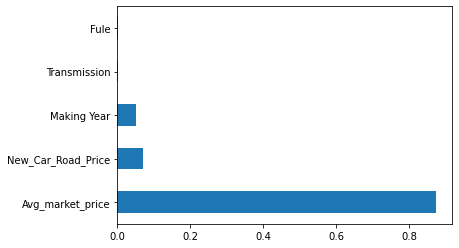

In [31]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestRegressor()

In [33]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [34]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [35]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [37]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [39]:
rf_random.best_score_

-534559746.28126746

In [40]:
predictions=rf_random.predict(x_test)

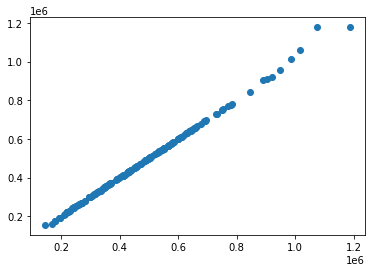

In [41]:
plt.scatter(y_test,predictions)

In [42]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1981.4087389399697
MSE: 67863592.30061091
RMSE: 8237.93616754894


In [43]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)